# Thermal Sunyaev Zeldovich Power Spectrum Calculation<a id = 'cl_sz'></a>


> **Note**: This calculation does not support `jax`. *[jan24]*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
import numpy as np
import os
from classy_sz import Class as Class_sz

**Cosmological parameters**

In [2]:
cosmo_params= {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665, 
"cosmo_model": 1, # use mnu-lcdm emulators
}

**Precision parameters**

In [3]:
precision_params = {
'x_outSZ': 4., # truncate profile beyond x_outSZ*r_s

'n_m_pressure_profile' :50, # default: 100, decrease for faster
'n_z_pressure_profile' :50, # default: 100, decrease for faster
    

'use_fft_for_profiles_transform' : 1, # use fft's or not. 
# only used if use_fft_for_profiles_transform set to 1
'N_samp_fftw' : 512,
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e4,
    
    
'ndim_redshifts' :30,

    
'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0001,    

    
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0001
}

## Generalized NFW prssure profile

In [4]:
%%time

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_tSZ_1h,tSZ_tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',



'pressure_profile':'GNFW', # can be Battaglia, Arnaud, etc
    
"P0GNFW": 8.130,
"c500": 1.156,
"gammaGNFW": 0.3292,
"alphaGNFW": 1.0620,
"betaGNFW":5.4807,
    



})
classy_sz.compute_class_szfast()

CPU times: user 4.5 s, sys: 647 ms, total: 5.15 s
Wall time: 747 ms


/Users/boris/Work/CLASS-SZ/SO-SZ/mcfit/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


In [5]:
l = np.asarray(classy_sz.cl_sz()['ell'])
cl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
cl_yy_2h = np.asarray(classy_sz.cl_sz()['2h'])

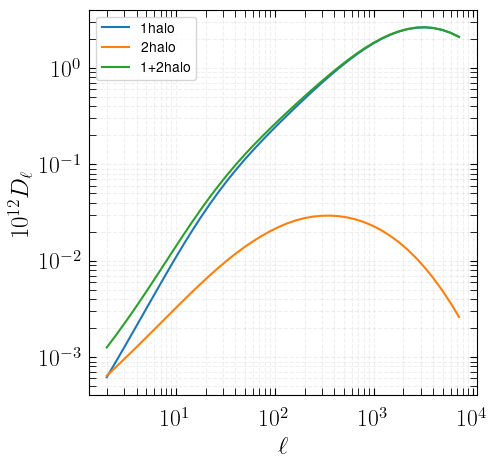

In [6]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$10^{12}D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
ax.legend()

## Arnaud et al 2010 tabulated profile

In [7]:
%%time
classy_sz_A10 = Class_sz()
classy_sz_A10.set(cosmo_params)
classy_sz_A10.set(precision_params)
classy_sz_A10.set({

'output': 'tSZ_1h,tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',

'pressure_profile':'A10', # can be Battaglia, Arnaud, etc

})
classy_sz_A10.compute_class_szfast()

/Users/boris/Work/CLASS-SZ/SO-SZ/mcfit/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


CPU times: user 3.88 s, sys: 679 ms, total: 4.56 s
Wall time: 625 ms


In [8]:
l_A10 = np.asarray(classy_sz_A10.cl_sz()['ell'])
cl_yy_1h_A10 = np.asarray(classy_sz_A10.cl_sz()['1h'])
cl_yy_2h_A10 = np.asarray(classy_sz_A10.cl_sz()['2h'])

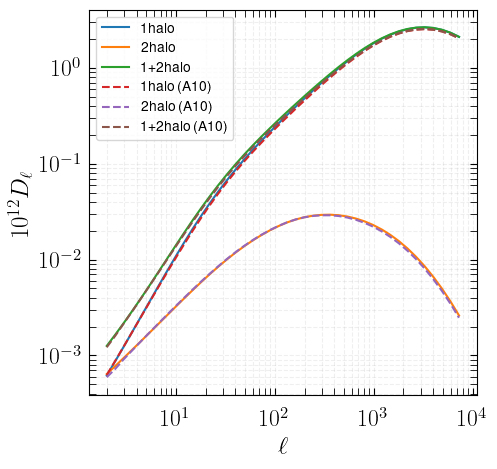

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$10^{12}D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')

ax.plot(l_A10,cl_yy_1h_A10,label='1halo (A10)',ls='--')
ax.plot(l_A10,cl_yy_2h_A10,label='2halo (A10)',ls='--')
ax.plot(l_A10,cl_yy_2h_A10+cl_yy_1h_A10,label='1+2halo (A10)',ls='--')
ax.legend()

## Battaglia et al 2012 pressure profile

In [10]:
%%time
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_1h,tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M200c',

'pressure_profile':'B12', # can be Battaglia, Arnaud, etc
'concentration_parameter':"D08",

})
classy_sz.compute_class_szfast()

CPU times: user 7.08 s, sys: 352 ms, total: 7.43 s
Wall time: 1.02 s


In [11]:
l = np.asarray(classy_sz.cl_sz()['ell'])
cl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
cl_yy_2h = np.asarray(classy_sz.cl_sz()['2h'])

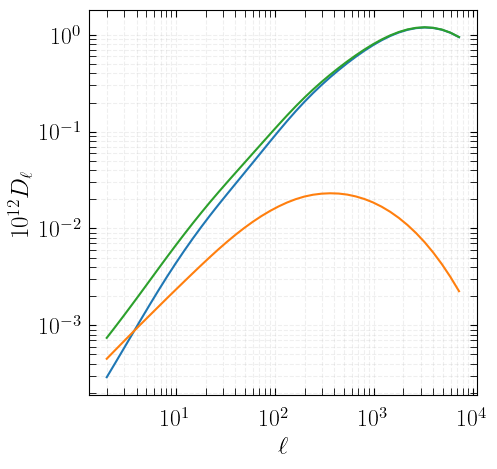

In [12]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$10^{12}D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')



## Trispectrum and Covariance Matrix Calculation

Set sky-fraction:

In [13]:
fsky = 1.

Multipole range:

In [14]:
ell_min = 100
ell_max = 8000
dlogell = 0.2

In [15]:
%%time
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_1h,tSZ_Trispectrum',
    
"ell_min" : ell_min,
"ell_max" : ell_max,
'dell': 0.,
'dlogell': dlogell,
    
# 'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',
'pressure_profile':'A10', 


})
classy_sz.compute_class_szfast()

CPU times: user 7.35 s, sys: 409 ms, total: 7.76 s
Wall time: 980 ms


Determine number fo modes in each bins:


In [16]:
l = np.asarray(classy_sz.cl_sz()['ell'])

In [17]:
l

array([ 100.        ,  122.14027582,  149.18246976,  182.21188004,
        222.55409285,  271.82818285,  332.01169227,  405.51999668,
        495.30324244,  604.96474644,  738.90560989,  902.50134994,
       1102.31763806, 1346.3738035 , 1644.46467711, 2008.55369232,
       2453.25301971, 2996.41000474, 3659.82344437, 4470.11844933,
       5459.81500331, 6668.63310409])

In [18]:
bin_edges = np.sqrt(l[:-1] * l[1:])
bin_edges = np.concatenate(([ell_min], bin_edges, [ell_max]))

In [19]:
all_ls = np.arange(ell_min,ell_max)

In [20]:
dells , _ = np.histogram(all_ls, bins=bin_edges)

In [21]:
%%time


dl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
tllprime_sz = classy_sz.tllprime_sz().copy() # note: sqrt(T_ll') ~ 10^12 y^2 ~ C_l 
tllp = np.zeros((len(l),len(l)))
mllp = np.zeros((len(l),len(l)))
mllpG = np.zeros((len(l),len(l)))
for il in range(len(l)):
    for ilp in range(len(l)):
        lil =l[il]
        lilp = l[ilp]
        dell = dells[il]
        sig_gauss_l = np.sqrt(2./(2*lil+1.))*dl_yy_1h[il]/np.sqrt(dell*fsky)
        if il == ilp:
            mllp[il][ilp] = (sig_gauss_l*sig_gauss_l+lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]/4./np.pi/fsky)*1e-24
            mllpG[il][ilp] = (sig_gauss_l*sig_gauss_l)*1e-24
        else:
            mllp[il][ilp] = lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]/4./np.pi/fsky*1e-24
        tllp[il][ilp] = lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]*1e-24

CPU times: user 5.1 ms, sys: 691 µs, total: 5.79 ms
Wall time: 6.64 ms


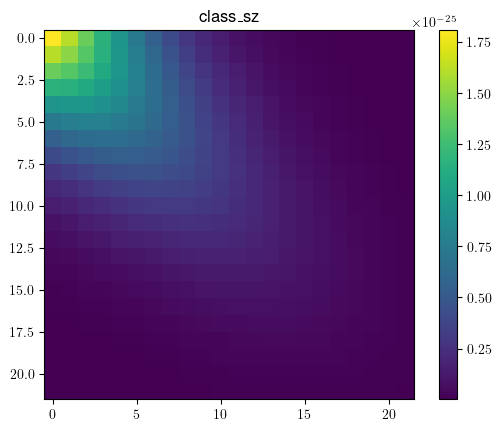

In [23]:
plt.imshow(tllp)
plt.title("class_sz")
plt.colorbar()

<ErrorbarContainer object of 3 artists>

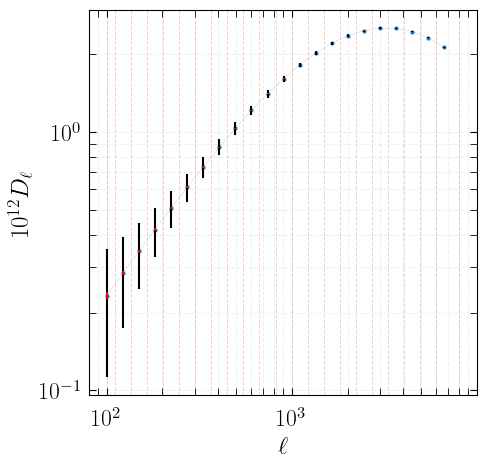

In [24]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$10^{12}D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,dl_yy_1h,label='1halo',marker='o',markersize=2.,lw=0.1)
for edge in bin_edges:
    ax.axvline(edge, color='red', linestyle='--', linewidth=0.7,alpha=0.2)  # Customize as needed

yerrG = np.sqrt(np.diag(mllpG))
yerrTOT = np.sqrt(np.diag(mllp))
ax.errorbar(l,dl_yy_1h,yerr=1e12*yerrTOT,ls='None',c='k')
ax.errorbar(l,dl_yy_1h,yerr=1e12*yerrG,ls='None',c='r')

Note that the gauusian contribution in first bin here only accounts for half the number of modes. Either truncate it, or ammend the code above.  